##  ORB Algorithm  for feature extraction and object tracking

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
%matplotlib inline

## Reading images

In [40]:
image_1st=cv2.imread("images/jkrolling.jpg")
image_2nd=cv2.imread("images/harry_book.jpg")

## Converting into gray and rgb formats

In [46]:
training_rgb=cv2.cvtColor(image_1st,cv2.COLOR_BGR2RGB)  # converting into rgb
query_rgb=cv2.cvtColor(image_2nd,cv2.COLOR_BGR2RGB)   

training_gray=cv2.cvtColor(image_1st,cv2.COLOR_BGR2GRAY)  # converting into grayscale
query_gray=cv2.cvtColor(image_2nd,cv2.COLOR_BGR2GRAY)

t_rgb_copy=copy.copy(training_rgb) # saving a copy for future use
q_rgb_copy=copy.copy(query_rgb)

t_gray_copy=copy.copy(training_gray) # saving a copy for future use
q_gray_copy=copy.copy(query_gray)



## Preview of images

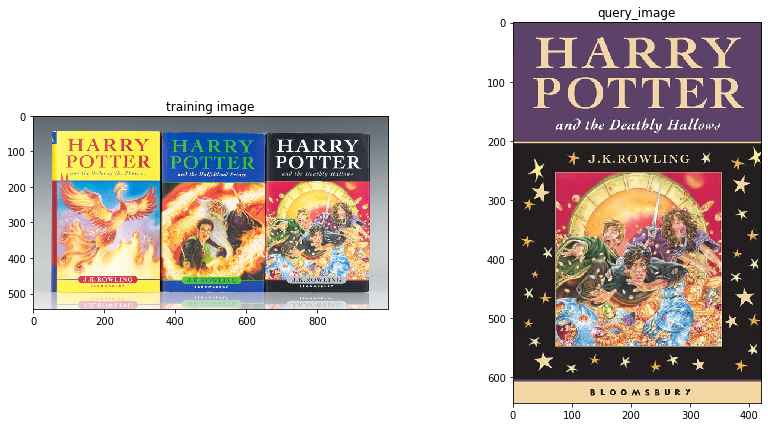

In [47]:
plt.subplot(121)
plt.title("training image")
plt.imshow(training_rgb)
plt.subplot(122)
plt.title("query_image")
plt.imshow(query_rgb)

## Applying ORB

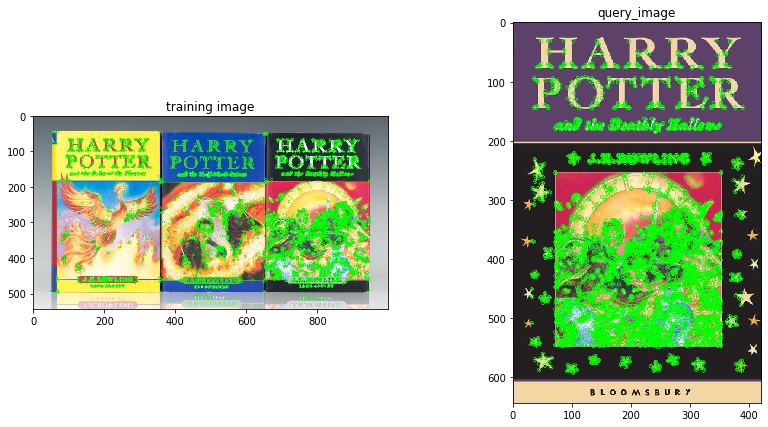

In [48]:
orb=cv2.ORB_create(5000,2.1) # using ORB class function 

train_keyp,train_desc=orb.detectAndCompute(training_gray,None) #detecting keypoints and descriptor
query_keyp,query_desc=orb.detectAndCompute(query_gray,None)

cv2.drawKeypoints(training_rgb,train_keyp,training_rgb,color=(0,255,0)) # drawing keypoints on images
cv2.drawKeypoints(query_rgb,query_keyp,query_rgb,color=(0,255,0))
plt.rcParams["figure.figsize"]=[14.0,7.0]
plt.subplot(121)
plt.title("training image")
plt.imshow(training_rgb)
plt.subplot(122)
plt.title("query_image")
plt.imshow(query_rgb)

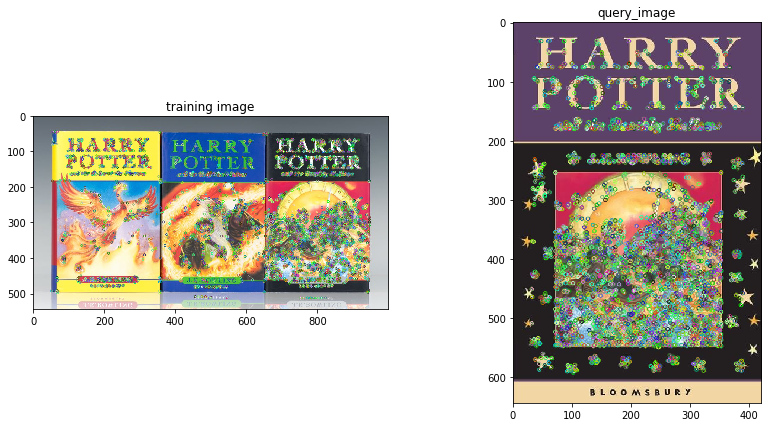

In [49]:
# drawing rich keypoints on images
cv2.drawKeypoints(training_rgb,train_keyp,training_rgb,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG) 
cv2.drawKeypoints(query_rgb,query_keyp,query_rgb,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.rcParams["figure.figsize"]=[14.0,7.0]
plt.subplot(121)
plt.title("training image")
plt.imshow(training_rgb)
plt.subplot(122)
plt.title("query_image")
plt.imshow(query_rgb)

## Matching features with train and query image

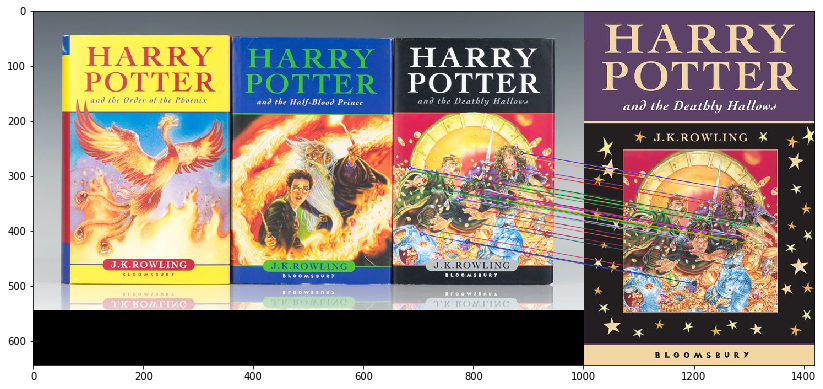

In [54]:
brute_force_matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) # creating instance of Brute force matcher

matches=brute_force_matcher.match(train_desc,query_desc,None) 

matches=sorted(matches,key=lambda x:x.distance) # sorting the match keypoint on the basis of distance

#drawing result on copy query images
result_rgb=cv2.drawMatches(t_rgb_copy,train_keyp,q_rgb_copy,query_keyp,matches[:30],q_rgb_copy,flags=2)


plt.imshow(result)
plt.show()

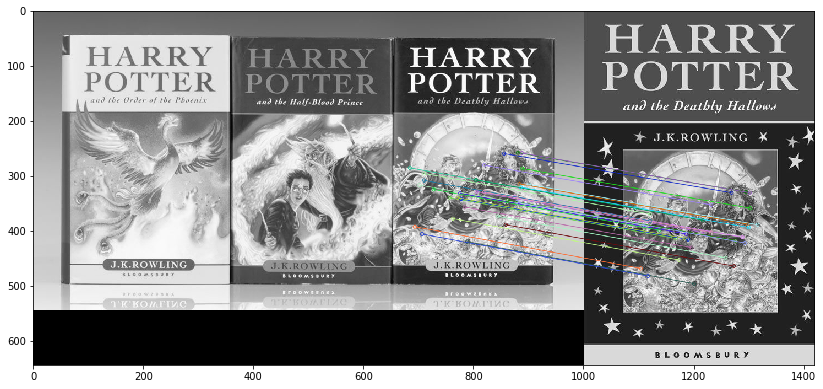

In [55]:
result_gray=cv2.drawMatches(t_gray_copy,train_keyp,q_gray_copy,query_keyp,matches[:30],q_gray_copy,flags=2)
plt.imshow(result_gray)
plt.show()